In [5]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image


In [6]:
# Non-normalised data
df_no_outliers = pd.read_csv('new_df_without_outliers_copy_smote_resampled_noNormalised.csv')
df_outliers = pd.read_csv('new_df_outliers_only_copy_smote_resampled_noNormalised.csv')

# Normalised data
# df_no_outliers = pd.read_excel('../Data_Set/new_df_without_outliers_copy_smote_resampled.xlsx')
# df_outliers = pd.read_excel('../Data_Set/new_df_outliers_only_copy_smote_resampled.xlsx')

df = pd.concat([df_outliers,df_no_outliers])
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,54.0,0,0,54.700000,6.000000,100,0.310171,-0.310005,0
1,34.0,0,0,56.430000,6.200000,200,-0.052540,-0.310005,0
2,67.0,0,0,63.480000,8.800000,155,-0.052540,-0.310005,1
3,38.0,0,0,55.610000,6.500000,130,-0.052540,0.561670,0
4,30.0,0,0,50.130000,6.000000,100,-0.273853,-0.310005,0
...,...,...,...,...,...,...,...,...,...
181139,80.0,0,0,27.191924,6.949298,126,0.554826,0.160772,1
181140,80.0,0,0,27.320000,5.800000,155,0.313504,-0.052799,1
181141,35.0,0,0,27.320357,6.995535,159,0.383605,0.160772,1
181142,58.0,0,0,27.320000,6.017092,155,-0.797024,0.160772,1


In [7]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,54.0,0,0,54.700000,6.000000,100,0.310171,-0.310005,0
1,34.0,0,0,56.430000,6.200000,200,-0.052540,-0.310005,0
2,67.0,0,0,63.480000,8.800000,155,-0.052540,-0.310005,1
3,38.0,0,0,55.610000,6.500000,130,-0.052540,0.561670,0
4,30.0,0,0,50.130000,6.000000,100,-0.273853,-0.310005,0
...,...,...,...,...,...,...,...,...,...
181139,80.0,0,0,27.191924,6.949298,126,0.554826,0.160772,1
181140,80.0,0,0,27.320000,5.800000,155,0.313504,-0.052799,1
181141,35.0,0,0,27.320357,6.995535,159,0.383605,0.160772,1
181142,58.0,0,0,27.320000,6.017092,155,-0.797024,0.160772,1


In [8]:
df['bmi'] = df['bmi'].round().astype(int)
df['age'] = df['age'].round().astype(int)

df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,54,0,0,55,6.000000,100,0.310171,-0.310005,0
1,34,0,0,56,6.200000,200,-0.052540,-0.310005,0
2,67,0,0,63,8.800000,155,-0.052540,-0.310005,1
3,38,0,0,56,6.500000,130,-0.052540,0.561670,0
4,30,0,0,50,6.000000,100,-0.273853,-0.310005,0
...,...,...,...,...,...,...,...,...,...
181139,80,0,0,27,6.949298,126,0.554826,0.160772,1
181140,80,0,0,27,5.800000,155,0.313504,-0.052799,1
181141,35,0,0,27,6.995535,159,0.383605,0.160772,1
181142,58,0,0,27,6.017092,155,-0.797024,0.160772,1


In [9]:
# X_no_outliers = df_no_outliers.drop('diabetes', axis=1)
# y_no_outliers = df_no_outliers['diabetes']

# X_outliers = df_outliers.drop('diabetes', axis=1)
# y_outliers = df_outliers['diabetes']

X = df.drop('diabetes',axis=1)
y = df['diabetes']

# Decision Tree without outliers

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5, 0.9, 'HbA1c_level <= 5.7\nentropy = 1.0\nsamples = 149849\nvalue = [74882, 74967]'),
 Text(0.2, 0.7, 'HbA1c_level <= 5.699\nentropy = 0.247\nsamples = 38845\nvalue = [37248.0, 1597.0]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 31085\nvalue = [31085, 0]'),
 Text(0.3, 0.5, 'blood_glucose_level <= 210.0\nentropy = 0.733\nsamples = 7760\nvalue = [6163, 1597]'),
 Text(0.2, 0.3, 'age <= 54.5\nentropy = 0.634\nsamples = 7335\nvalue = [6163, 1172]'),
 Text(0.1, 0.1, 'entropy = 0.28\nsamples = 4630\nvalue = [4405, 225]'),
 Text(0.3, 0.1, 'entropy = 0.934\nsamples = 2705\nvalue = [1758.0, 947.0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 425\nvalue = [0, 425]'),
 Text(0.8, 0.7, 'HbA1c_level <= 6.6\nentropy = 0.924\nsamples = 111004\nvalue = [37634, 73370]'),
 Text(0.7, 0.5, 'blood_glucose_level <= 113.0\nentropy = 0.996\nsamples = 81663\nvalue = [37634, 44029]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 11577\nvalue = [11577, 0]'),
 Text(0.8, 0.3, 'age <= 42.5\nentropy = 0.952\ns

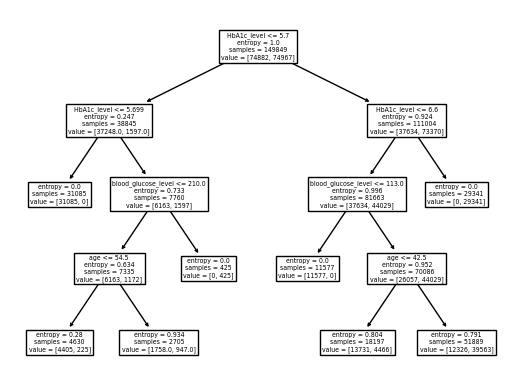

In [12]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X.columns.tolist())

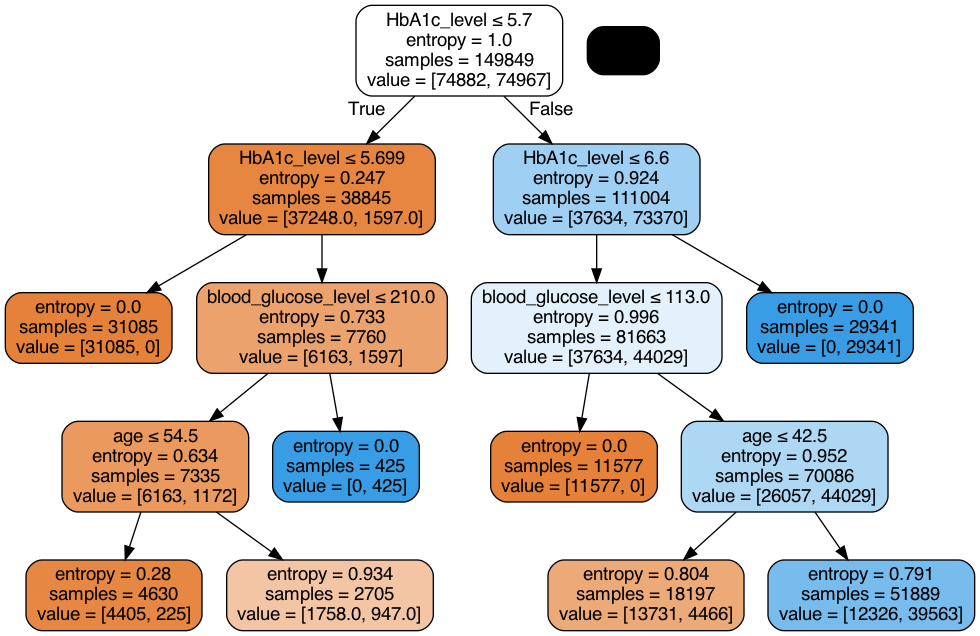

In [13]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

If an individual's HbA1c level is less than or equal to 5.35 -> low risk for diabetes.
High blood glucose levels typically lead to a higher predicted risk of diabetes.
Age can be a factor if HbA1c and blood glucose levels are borderline, being younger than 42.5 might have risk of diabetes

In [14]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
21497,0,0
152047,1,1
11796,0,0
42446,0,0
40899,0,0
73711,0,0
56503,0,0
76988,0,0
25090,0,0
117491,1,1


In [15]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[15809,  1488],
       [ 2965, 17201]])

In [16]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))


Accuracy: 0.8811360542401836

Precision: 0.8529703461271447

Recall: 0.920380972764728

F1 score: 0.8853944151331875


<h3>Hyperparameter Tuning</h3>

In [21]:
# It will take around 7 minutes to run.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [200,300,400,500,600],
    'min_samples_leaf': [2500,3000,3500,4000],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
# evaluate the model

# def function to evaluate model
def evaluate_model(model):
    predictions = model.predict(X_train)
    print("Train Accuracy :", accuracy_score(y_train,predictions))
    print('\nPrecision:',precision_score(y_train, predictions))
    print('\nRecall:',recall_score(y_train, predictions))
    print('\nF1 score:',f1_score(y_train, predictions))
    
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, predictions))
    print("-"*50)
    
    predictions = model.predict(X_test)
    print("Test Accuracy :", accuracy_score(y_test, predictions))
    print('\nPrecision:',precision_score(y_test, predictions))
    print('\nRecall:',recall_score(y_test, predictions))
    print('\nF1 score:',f1_score(y_test, predictions))
    
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

# call function
evaluate_model(best_model)
#accuracy_score = best_model.score(X_test, y_test)
print('Best Parameters:',grid_search.best_params_,end='\n\n')
#print('accuracy:', accuracy_score)

Train Accuracy : 0.8998992318934393

Precision: 0.8952530352364255

Recall: 0.9059052649832593

F1 score: 0.9005476509355151
Train Confusion Matrix:
[[66936  7946]
 [ 7054 67913]]
--------------------------------------------------
Test Accuracy : 0.9008621840215679

Precision: 0.8979537602976349

Recall: 0.9040077050671518

F1 score: 0.9009705631399317
Test Confusion Matrix:
[[16854  1920]
 [ 1794 16895]]
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2500, 'min_samples_split': 200}



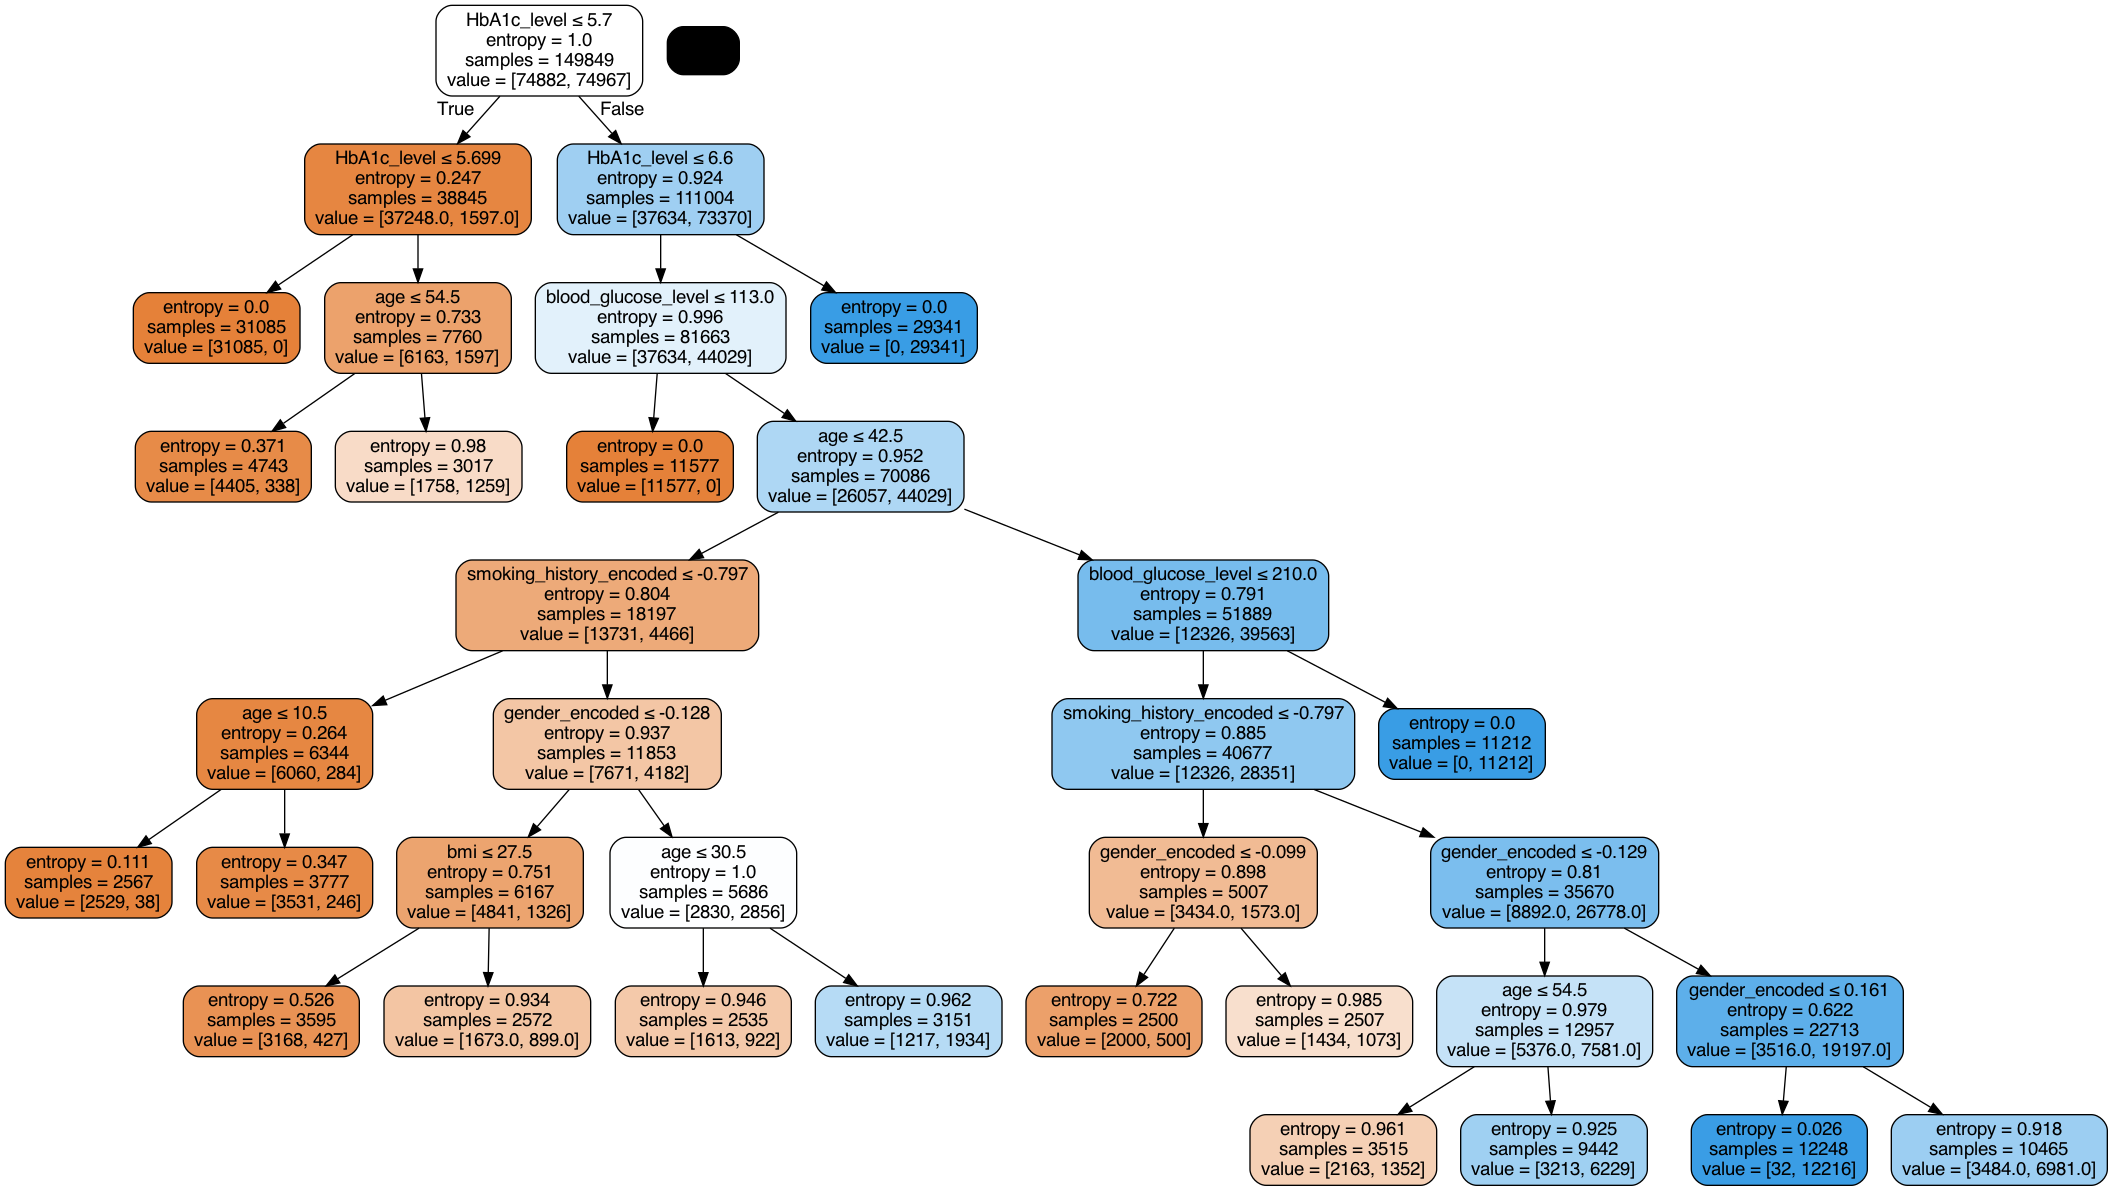

In [22]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
# check validation curve for over & under fitting
from sklearn.model_selection import validation_curve
